# Data scale and split

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [36]:
import pickle
X = pd.read_pickle('Data/Heart/X.pickle')
y= pd.read_pickle('Data/Heart/y.pickle')

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 1) knn

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
#1) Hyper parameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_dict = {
                'n_neighbors':range(2,21), 
                'weights':['uniform','distance'], 
                'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
           }
search = GridSearchCV(KNeighborsClassifier(),param_dict,cv=4)
search.fit(X_train,y_train)
print(search.best_params_,search.best_score_)

{'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'distance'} 0.7110064153969526


In [17]:
#2) make the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 12, weights='distance')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


Text(0.5, 1.0, 'Finding optimal n_neighbors')

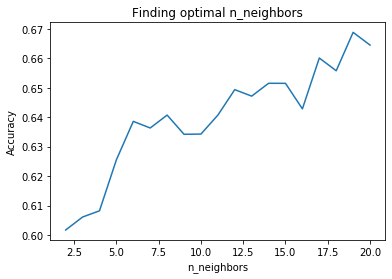

In [20]:
#3) validate

scores = []
for i in range(2,21):
    clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= i, weights='distance')
    scores.append(cross_val_score(clf,X,y,cv=4).mean())

import matplotlib.pyplot as plt
plt.plot(range(2,21),scores)
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.title("Finding optimal n_neighbors")


In [24]:
#4) report
accuracy_score(y_test,y_pred)

0.6810344827586207

In [30]:
confusion_matrix(y_test,y_pred)

array([[68,  9],
       [28, 11]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.88      0.79        77
           2       0.55      0.28      0.37        39

    accuracy                           0.68       116
   macro avg       0.63      0.58      0.58       116
weighted avg       0.66      0.68      0.65       116



# 2) adaboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import  AdaBoostClassifier

#1) Hyper parameter
param_dict = {
                 'criterion':['gini', 'entropy'],
                 'max_depth':[2,3,4,5,6,7,None], 
                 'random_state':[0], 
                 'min_impurity_decrease':[0,0.05, 0.1]
             }

search = GridSearchCV(DecisionTreeClassifier(),param_dict,cv=4)
search.fit(X_train,y_train)
search.best_params_
search.best_score_
base_model=DecisionTreeClassifier(criterion= 'gini', max_depth=3,min_impurity_decrease= 0, random_state= 0)
from sklearn.model_selection import  GridSearchCV
param_dict = {
                 'n_estimators':[10,100,200,500], 
                 'learning_rate':[1.0,0.95,0.85], 
                 'random_state':[0]
             }

search = GridSearchCV(AdaBoostClassifier(),param_dict,cv=4)
search.fit(X_train,y_train)
print(search.best_params_,search.best_score_)


In [ ]:
#2) make the model
ada = AdaBoostClassifier(base_model,learning_rate= 1.0, n_estimators=100, random_state=0)
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

In [ ]:
#3) validate

scores = []
for i in range(50,200,10):
    model = AdaBoostClassifier(base_model,learning_rate= 1.0, n_estimators=i, random_state=0)
    scores.append(cross_val_score(model,X,y,cv=4).mean())

import matplotlib.pyplot as plt
plt.plot(range(50,200,10),scores)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Finding optimal n_estimators")

In [ ]:
#4) report  
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

# 3)random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV
param_dict = {
                 'n_estimators':[10,20,50,100],
                 'criterion':['gini', 'entropy'],
                 'max_depth':[2,3,4,5,6,7,None], 
                 'random_state':[0], 
                 'min_impurity_decrease':[0,0.05, 0.1]
             }

search = GridSearchCV(RandomForestClassifier(),param_dict,cv=4)
search.fit(X_train,y_train)
print(search.best_params_,search.best_score_)



In [ ]:
#2) make the model
rf = RandomForestClassifier(criterion= 'entropy',n_estimators=10,random_state=0,max_depth=None,min_impurity_decrease=0)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)



In [ ]:
#3) validate
scores=[]
for i in range(1,110):
    rf = RandomForestClassifier(criterion= 'entropy',n_estimators=i,random_state=0,max_depth=None,min_impurity_decrease=0)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))
    
    
import matplotlib.pyplot as plt
plt.plot(range(1,110),scores)
plt.xlabel('n_estimators')   
plt.ylabel('Accuracy')
plt.show() 

In [ ]:
#4) report  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

# 4)SVM

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#1) Hyper parameter 

param_dict = {
                'kernel': ['linear', 'poly', 'rbf'],
                'gamma' : [0.1,1,10],
                'C': [0.1,1,2]                
            }

model = GridSearchCV(SVC(),param_dict,cv=4)
model.fit(X_train,y_train)
print(model.best_params_,model.best_score_)

In [ ]:
#2) make the model
from sklearn.svm import SVC
svm = SVC(C= 0.1, kernel= 'poly',gamma=1)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [ ]:
#3) validate
scores = []
for i in  [0.01,0.1,0.5]:
    model = SVC(C= i, kernel= 'poly',gamma=1)
    scores.append(cross_val_score(model,X,y,cv=4).mean())

import matplotlib.pyplot as plt
plt.plot([0.001, 0.01,0.1,0.5],scores)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Finding optimal C")


In [ ]:
#4) report  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

# 5)logistic regression

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [146]:
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import LogisticRegression
param_dict = {
             'tol':[0.0001,0.001, 0.01],
             'C': [0.1,1,2],  
             'random_state':[0], 
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
             'max_iter':[2,5,10,20,30,50,100]                
            }

model = GridSearchCV(LogisticRegression(),param_dict,cv=4)
model.fit(X_train,y_train)


C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of i

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteratio

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 2],
                         'max_iter': [2, 5, 10, 20, 30, 50, 100],
                         'random_state': [0],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             pre_d

In [147]:
print(model.best_params_,model.best_score_)

{'C': 0.1, 'max_iter': 5, 'random_state': 0, 'solver': 'saga', 'tol': 0.0001} 0.7460716895887317


In [149]:
#2) make the model

model = LogisticRegression(C= 0.1, max_iter= 5, random_state= 0, solver= 'saga', tol= 0.0001)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [151]:
#3) validate
from sklearn.model_selection import cross_val_score
scores = []
for i in  [2,5,10,20,30,50,100]:
    model = LogisticRegression(C= 1, max_iter= i, random_state= 0, solver='newton-cg', tol= 0.0001)
    scores.append(cross_val_score(model,X,y,cv=4).mean())

C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\razer\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iter

Text(0.5, 1.0, 'Finding optimal C')

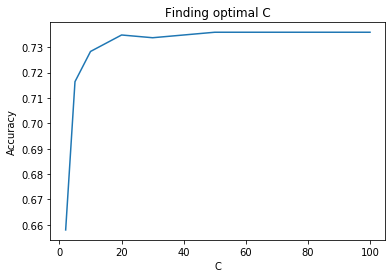

In [152]:
import matplotlib.pyplot as plt
plt.plot([2,5,10,20,30,50,100],scores)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Finding optimal C")

In [153]:
#4) report  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)  

0.7012987012987013

In [154]:
confusion_matrix(y_test,y_pred)

array([[129,  33],
       [ 36,  33]], dtype=int64)

In [155]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           1       0.78      0.80      0.79       162
           2       0.50      0.48      0.49        69

    accuracy                           0.70       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.70      0.70      0.70       231



# Deep Neural Network

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
y_train_hot = pd.get_dummies(y_train)
y_test_hot=pd.get_dummies(y_test)
y_test_hot



,1,2
113,0,1
21,1,0
78,0,1
118,0,1
225,1,0
...,...,...
8,1,0
205,1,0
5,1,0
135,0,1


In [40]:
X_test.shape

(116, 9)

In [42]:
y_test_hot.shape

(116, 2)

In [74]:
L1_IN = X_train.shape[1]
L1_OUT=3
print('Layer 1 :  '+str(L1_IN)+' ----->  '+ str(L1_OUT))
L2_IN=L1_OUT
L2_OUT=2
print('Layer 2 :  '+str(L2_IN)+' ----->  '+ str(L2_OUT))

Layer 1 :  9 ----->  3
Layer 2 :  3 ----->  2


In [75]:
import tensorflow as tf
model = tf.keras.models.Sequential();
model.add(tf.keras.layers.Dense(L1_OUT, input_shape=(L1_IN,), activation='sigmoid'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(L2_OUT, input_shape=(L2_IN,), activation='softmax'))

In [76]:
# using Adam
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#ckeck SGD , not good , make accuracy 0.7, Not use
sgd=tf.keras.optimizers.SGD(0.001, 0.9)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [77]:

# Train the model
result = model.fit(X_train, y_train_hot, validation_data=(X_test, y_test_hot), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train_hot))
print("Test score:", model.evaluate(X_test, y_test_hot))

Train on 346 samples, validate on 116 samples
Epoch 1/100
346/346 [==============================] - 0s 993us/sample - loss: 1.0634 - accuracy: 0.3497 - val_loss: 1.0740 - val_accuracy: 0.3362
Epoch 2/100
346/346 [==============================] - 0s 87us/sample - loss: 1.0353 - accuracy: 0.3497 - val_loss: 1.0448 - val_accuracy: 0.3362
Epoch 3/100
346/346 [==============================] - 0s 81us/sample - loss: 1.0086 - accuracy: 0.3497 - val_loss: 1.0168 - val_accuracy: 0.3362
Epoch 4/100
346/346 [==============================] - 0s 98us/sample - loss: 0.9816 - accuracy: 0.3497 - val_loss: 0.9910 - val_accuracy: 0.3362
Epoch 5/100
346/346 [==============================] - 0s 87us/sample - loss: 0.9581 - accuracy: 0.3497 - val_loss: 0.9653 - val_accuracy: 0.3362
Epoch 6/100
346/346 [==============================] - 0s 84us/sample - loss: 0.9350 - accuracy: 0.3497 - val_loss: 0.9408 - val_accuracy: 0.3362
Epoch 7/100
346/346 [==============================] - 0s 92us/sample - loss:

346/346 [==============================] - 0s 87us/sample - loss: 0.5728 - accuracy: 0.7139 - val_loss: 0.5597 - val_accuracy: 0.7500
Epoch 57/100
346/346 [==============================] - 0s 90us/sample - loss: 0.5718 - accuracy: 0.7110 - val_loss: 0.5585 - val_accuracy: 0.7500
Epoch 58/100
346/346 [==============================] - 0s 81us/sample - loss: 0.5705 - accuracy: 0.7081 - val_loss: 0.5573 - val_accuracy: 0.7500
Epoch 59/100
346/346 [==============================] - 0s 93us/sample - loss: 0.5694 - accuracy: 0.7110 - val_loss: 0.5561 - val_accuracy: 0.7500
Epoch 60/100
346/346 [==============================] - 0s 101us/sample - loss: 0.5684 - accuracy: 0.7110 - val_loss: 0.5550 - val_accuracy: 0.7500
Epoch 61/100
346/346 [==============================] - 0s 92us/sample - loss: 0.5673 - accuracy: 0.7139 - val_loss: 0.5541 - val_accuracy: 0.7414
Epoch 62/100
346/346 [==============================] - 0s 101us/sample - loss: 0.5664 - accuracy: 0.7110 - val_loss: 0.5531 - val

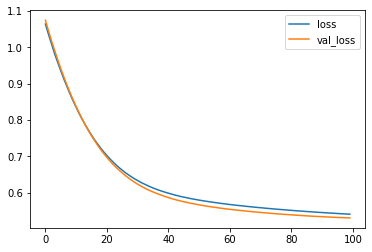

In [78]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

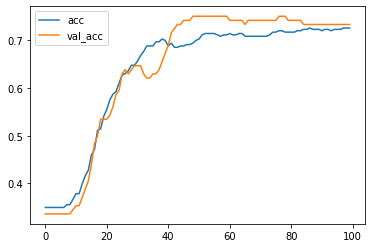

In [79]:
# Plot the accuracy too
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()

In [57]:
y_pred = model.predict(X_test)
np.round(y_pred)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [58]:
#Save the model
model.save('Dence.h5')

In [59]:
#Retrive the model and test it
model = tf.keras.models.load_model('Dence.h5')
print(model.layers)
model.evaluate(X_test, y_test_hot)

[<tensorflow.python.keras.layers.core.Dense object at 0x0000017E01426EC8>, <tensorflow.python.keras.layers.core.Dropout object at 0x0000017E0142B988>, <tensorflow.python.keras.layers.core.Dense object at 0x0000017E014428C8>]
116/116 [==============================] - 0s 578us/sample - loss: 0.6125 - accuracy: 0.7500


[0.6125256151988588, 0.75]

# Deep Learning 